# Getting Started with SWIPER-SIM Simulator

In [1]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

## Simulating Window Decoding of 10 Lattice Surgery T Gates

In [2]:
from swiper.schedule_experiments import RegularTSchedule
from swiper.simulator import DecodingSimulator
import swiper.plot as plotter

import pickle as pkl
import numpy as np

### Fixed Decoder Latency

In [3]:
latency = 14 # us
distance = 7 
scheduling_method = 'sliding' # Sliding Window
speculation_mode = 'separate' # Predictor and decoder are separate 
speculation_accuracy = 0.9
t_schedule = RegularTSchedule(10, 0)

Surface code rounds: 378it [00:00, 17163.90it/s]


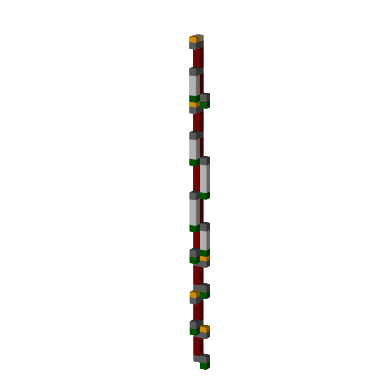

In [4]:
simulator = DecodingSimulator()
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=t_schedule.schedule,
    distance=distance,
    scheduling_method=scheduling_method,
    decoding_latency_fn=lambda _: latency,
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=speculation_accuracy,
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1)
ax.set_axis_off()

### Variable Decoder Latency

Pre-generated PyMatching latencies are saved in `notebooks/data/decoder_dists.pkl` for distances 13 - 31

In [5]:
decoder_dists = pkl.load(open('notebooks/data/decoder_dists.pkl', 'rb'))
distance = 13

# Inner decoder function takes as input the decoding volume in units of d^2
# Saved decoder dists are in units of d^3. Convert by dividing by distance and rounding up
sampled_latency = lambda vol: np.random.choice(decoder_dists[distance][max(2,int(np.ceil(vol / distance)))])

Surface code rounds: 775it [00:00, 19476.71it/s]


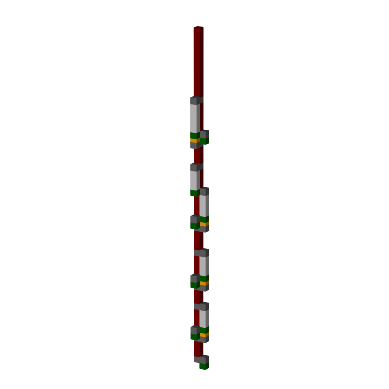

In [6]:
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=t_schedule.schedule,
    distance=distance,
    scheduling_method=scheduling_method,
    decoding_latency_fn=sampled_latency,
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=speculation_accuracy,
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1)
ax.set_axis_off()

### Parallel with and without speculation

In [7]:
speculation_method = 'parallel'

Surface code rounds: 879it [00:00, 18852.49it/s]


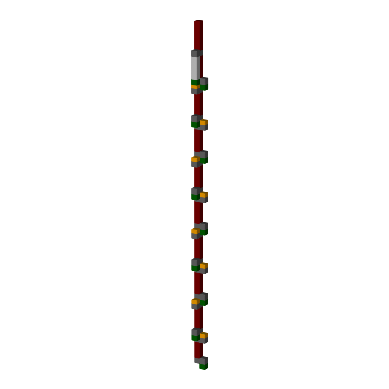

In [8]:
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=t_schedule.schedule,
    distance=distance,
    scheduling_method=speculation_method,
    decoding_latency_fn=lambda _: latency, # Fixed latency to reduce variance
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=0, # 0% accuracy is equivalent to no speculation
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1)
ax.set_axis_off()

Surface code rounds: 539it [00:00, 18372.90it/s]


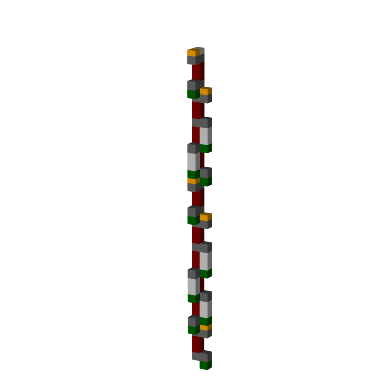

In [9]:
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=t_schedule.schedule,
    distance=distance,
    scheduling_method=scheduling_method,
    decoding_latency_fn=lambda _: latency, # Fixed latency to reduce variance
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=speculation_accuracy,
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1)
ax.set_axis_off()

## Simulating Window Decoding for 15-to-1 Magic State Distillation

In [10]:
from swiper.schedule_experiments import MSD15To1Schedule

In [11]:
msd_schedule = MSD15To1Schedule()

latency = 14 # us
distance = 7 
scheduling_method = 'sliding' 
speculation_mode = 'separate' 
speculation_accuracy = 0.9


Surface code rounds: 107it [00:00, 3537.07it/s]


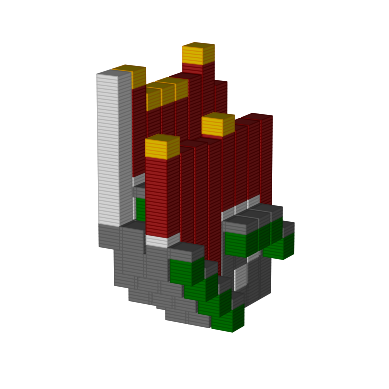

In [12]:
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=msd_schedule.schedule,
    distance=distance,
    scheduling_method=scheduling_method,
    decoding_latency_fn=lambda _: latency,
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=speculation_accuracy,
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1)
ax.set_axis_off()

## Simulating Window Decoding for General Benchmarks

A set of pre-compiled schedules are included in `benchmarks/cached_schedules`.

Arbitrary cirq circuits can be compiled and simulated. See `benchmarks/benchmark_circuits.py` for examples of creating new benchmarks. However, if you would like to run your own benchmarks with SWIPER-SIM `gridsynth` and `lsqecc_slicer` executables are required to be in `benchmarks/` which are called by `cirq_to_ls.py`. See the following pages for installation: [gridsynth installation](https://www.mathstat.dal.ca/~selinger/newsynth/), [lsqecc_slicer installation](https://github.com/latticesurgery-com/liblsqecc)

In [13]:
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule

In [14]:
adder = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/adder_n18.lss', 'r').read())

In [15]:
latency = 14 # us
distance = 7 
scheduling_method = 'sliding' 
speculation_mode = 'separate' 
speculation_accuracy = 0.9

Surface code rounds: 2815it [00:03, 759.71it/s] 


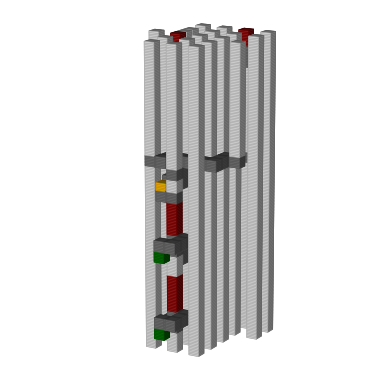

In [16]:
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=adder,
    distance=distance,
    scheduling_method=scheduling_method,
    decoding_latency_fn=lambda _: latency,
    speculation_mode=speculation_mode,
    speculation_latency=1,
    speculation_accuracy=speculation_accuracy,
    progress_bar=True,
)

ax = plotter.plot_device_schedule_trace(device_data, spacing=1, z_min=300, z_max=500)
ax.set_axis_off()